Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
from sklearn.datasets import load_boston

In [129]:
boston = load_boston()

In [130]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [131]:
data = boston["data"]

data.shape

(506, 13)

In [132]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [133]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [134]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [135]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [139]:

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [140]:
from sklearn.manifold import TSNE

In [141]:
xtsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = xtsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


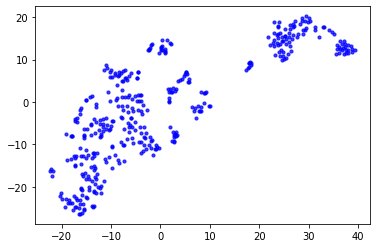

In [142]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s = 10, color = 'blue', alpha = 0.75)
plt.show()

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [143]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter = 100, random_state=42)

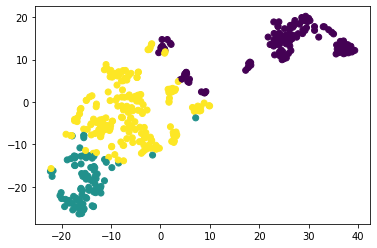

In [177]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [178]:
X_train.CRIM.mean()

3.6091246287128715

In [179]:
X_train[labels_train == 0].CRIM.mean()

10.797028425196851

In [180]:
X_train[labels_train == 1].CRIM.mean()

0.07356558139534884

In [181]:
X_train[labels_train == 2].CRIM.mean()

0.4216602094240837

In [182]:
y_train.mean()

price    22.796535
dtype: float64

In [183]:
y_train[labels_train == 0].mean()

price    16.165354
dtype: float64

In [184]:
y_train[labels_train == 1].mean()

price    27.788372
dtype: float64

In [185]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

* Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [189]:
xtsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = xtsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


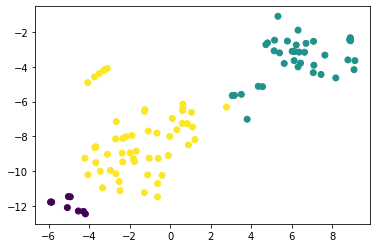

In [190]:
kmeans = KMeans(n_clusters=3)

labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [191]:
X_test.CRIM.mean()

3.630946764705882

In [193]:
X_test[labels_test == 0].CRIM.mean()

0.04070333333333334

In [194]:
X_test[labels_test == 1].CRIM.mean()

9.419181842105264

In [195]:
X_test[labels_test == 2].CRIM.mean()

0.2192969090909091

In [196]:
y_test.mean()

price    21.488235
dtype: float64

In [197]:
y_test[labels_test == 0].mean()

price    34.311111
dtype: float64

In [198]:
y_test[labels_test == 1].mean()

price    16.710526
dtype: float64

In [199]:
y_test[labels_test == 2].mean()

price    22.690909
dtype: float64